In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.metrics import categorical_crossentropy
from keras.layers import Dense, Flatten
from keras.optimizers import SGD, Adam

In [2]:
train_df = pd.read_csv('fashion-mnist_train.csv')
test_df = pd.read_csv('fashion-mnist_test.csv')

In [3]:
train_df

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Splitting into training, testing and validation
from sklearn.model_selection import train_test_split
x_train = train_df.drop(columns=['label'], axis = 1)
y_train = train_df['label']

testx = test_df.drop(columns=['label'], axis = 1)
testy = test_df['label']

x_test, x_val, y_test, y_val = train_test_split(testx, testy, train_size = 0.5, random_state = 42)

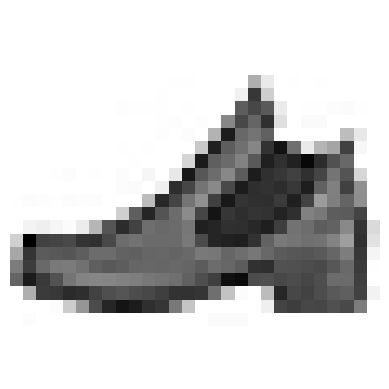

In [5]:
def plot_image(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
# X is a pandas DataFrame, convert to numpy array first
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

second_item = x_train[1]
plot_image(second_item)
plt.show()

In [6]:
#Creating a basic practice model (assignment said libraries are allowed)
model = Sequential()

#Checking input dimensions
print("Input_dim =",x_train.shape[1])
#Already flattened, best (need to reduce image to 1D array)

#Now adding the input layer
model.add(Dense(units = 128, input_dim = 784))

#Adding hidden layers (for-loop makes it kinda convenient instead of coding by-hand)
hidden_layer_count = 20
for layer in range(hidden_layer_count):
    model.add(Dense(units = 64, activation="leaky_relu"))

#Now adding the output layer, (10 classes so 10 units)
model.add(Dense(units = 10, activation="softmax"))


model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate = 0.001), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=35,validation_data=(x_test, y_test), verbose = 0)
loss, accuracy = model.evaluate(x_test, y_test)
print("Accuracy:",accuracy)


Input_dim = 784


157/157 [==============================] - 1s 7ms/step - loss: 0.3523 - accuracy: 0.8782
Accuracy: 0.8781999945640564


In [7]:
#Implementing our hyperparameter tuning
learning_rates = [0.0001, 0.001, 0.01]
hidden_layer_counts = [10, 20, 30]
hidden_layer_activations = ['selu', 'relu', 'tanh']
output_layer_activations = ['softmax', 'sigmoid']
accuracies = []
losses = []

for hidden_layer_count in hidden_layer_counts:
    for hidden_act in hidden_layer_activations:
        for oct in output_layer_activations :
            for alpha in learning_rates:
                model = Sequential()
                #Now adding the input layer (idk, 30 neurons)
                model.add(Dense(units = 30, input_dim = 784, activation = 'relu'))
            
                for layer in range(hidden_layer_count):
                    model.add(Dense(units = 10, activation= hidden_act))

                #Now adding the output layer, (10 classes so 10 units)
                model.add(Dense(units = 10, activation=oct))

                # print("HIDDEN LAYER COUNT:",hidden_layer_count)
                # print("ACTIVATION FUNCTION:",hidden_act)
                # print("LEARNING RATE:",alpha) 
                # print("OUTPUT ACTIVATION FUNCTION:",oct)
                model.compile(loss="sparse_categorical_crossentropy", 
                              optimizer=Adam(learning_rate=alpha), 
                              metrics=["accuracy"])
                model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), verbose = 0)
                loss, accuracy = model.evaluate(x_test, y_test)
                losses.append(loss)
                accuracies.append(accuracy)


157/157 [==============================] - 1s 5ms/step - loss: 2.3769 - accuracy: 0.0972


In [11]:
max_accuracy = max(accuracies)
counter = 0
print("\t\t------BEST PARAMETERS------")
for hidden_layer_count in hidden_layer_counts:
    for hidden_act in hidden_layer_activations:
        for oct in output_layer_activations :
            for alpha in learning_rates:
                if accuracies[counter] == max_accuracy:
                    best_hidden_layer_count = hidden_layer_count
                    print("HIDDEN LAYER COUNT:", hidden_layer_count)
                    best_hidden_act = hidden_act
                    print("HIDDEN LAYER ACTIVATION FUNCTION:",hidden_act)
                    best_oct = oct
                    print("HIDDEN OUTPUT LAYER ACTIVATION FUNCTION:", oct)
                    best_alpha = alpha
                    print("LEARNING RATE:",alpha)
                    print("ACCURACY",round(accuracies[counter], 2))
                else:
                    counter += 1

		------BEST PARAMETERS------
HIDDEN LAYER COUNT: 10
HIDDEN LAYER ACTIVATION FUNCTION: relu
HIDDEN OUTPUT LAYER ACTIVATION FUNCTION: sigmoid
LEARNING RATE: 0.001
ACCURACY 0.84
HIDDEN LAYER COUNT: 10
HIDDEN LAYER ACTIVATION FUNCTION: relu
HIDDEN OUTPUT LAYER ACTIVATION FUNCTION: sigmoid
LEARNING RATE: 0.01
ACCURACY 0.84
HIDDEN LAYER COUNT: 10
HIDDEN LAYER ACTIVATION FUNCTION: relu
HIDDEN OUTPUT LAYER ACTIVATION FUNCTION: sigmoid
LEARNING RATE: 0.1
ACCURACY 0.84
HIDDEN LAYER COUNT: 10
HIDDEN LAYER ACTIVATION FUNCTION: tanh
HIDDEN OUTPUT LAYER ACTIVATION FUNCTION: softmax
LEARNING RATE: 0.0001
ACCURACY 0.84
HIDDEN LAYER COUNT: 10
HIDDEN LAYER ACTIVATION FUNCTION: tanh
HIDDEN OUTPUT LAYER ACTIVATION FUNCTION: softmax
LEARNING RATE: 0.001
ACCURACY 0.84
HIDDEN LAYER COUNT: 10
HIDDEN LAYER ACTIVATION FUNCTION: tanh
HIDDEN OUTPUT LAYER ACTIVATION FUNCTION: softmax
LEARNING RATE: 0.01
ACCURACY 0.84
HIDDEN LAYER COUNT: 10
HIDDEN LAYER ACTIVATION FUNCTION: tanh
HIDDEN OUTPUT LAYER ACTIVATION FUNC

For some reason the initial parameters I gave were the best ones in terms of accuracy, so that's what's best
and we'll use that.

In [7]:
#Now training on the best params
#Creating the model (assignment said libraries are allowed)
model = Sequential()

#Checking input dimensions
print("Input_dim =",x_train.shape[1])
#Already flattened, best (need to reduce image to 1D array)

#Now adding the input layer
model.add(Dense(units = 128, input_dim = 784))

#Adding hidden layers (for-loop makes it kinda convenient instead of coding by-hand)
hidden_layer_count = 20
for layer in range(hidden_layer_count):
    model.add(Dense(units = 64, activation="leaky_relu"))

#Now adding the output layer, (10 classes so 10 units)
model.add(Dense(units = 10, activation="softmax"))


model.compile(loss="sparse_categorical_crossentropy", optimizer=Adam(learning_rate = 0.001), metrics=["accuracy"])
model.fit(x_train, y_train, epochs=35,validation_data=(x_test, y_test), verbose = 0)


Input_dim = 784
157/157 [==============================] - 1s 5ms/step - loss: 0.3768 - accuracy: 0.8828
Accuracy: 0.8827999830245972


In [9]:
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Accuracy:",round(accuracy*100, 3))

loss, accuracy = model.evaluate(x_train, y_train)
print("Train Accuracy:",round(accuracy*100, 3))


157/157 [==============================] - 1s 6ms/step - loss: 0.3768 - accuracy: 0.8828
Test Accuracy: 88.28
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2869 - accuracy: 0.8989
Train Accuracy: 89.887


In [10]:
# Extract the weights of the first layer
weights = model.layers[0].get_weights()[0]
bias = model.layers[0].get_weights()[1]
print("WEIGHTS:",weights)
print("BIAS:",bias)

WEIGHTS: [[-0.4704969  -0.0063773  -0.43477723 ...  0.6436745  -0.1627261
  -0.42518175]
 [-0.00139512  0.7087653  -1.1007987  ...  0.15497454  0.45001972
  -0.66329515]
 [-0.6303145  -1.3739642   0.7703672  ...  0.7248442   0.62306505
  -0.5820369 ]
 ...
 [-0.35668758  0.5677803   0.20304127 ... -0.1131111  -0.30125
  -0.130448  ]
 [-0.65417296  0.6087842   0.09525212 ...  0.57284236 -0.1013427
  -0.3698139 ]
 [-0.6365473  -0.21410725 -0.4222135  ...  0.772162    0.6452345
  -0.48286936]]
BIAS: [-1.5849612   0.62533396  0.755828   -1.2997174   0.51499754 -1.0377604
 -0.00893425  0.2672797   0.49406284  0.3771159  -1.1465024   1.2735186
 -0.42755583 -0.1398022  -0.19251536  0.37703556  0.05736382  0.05807373
  0.7579824  -0.27055928  0.9429121   0.18377192 -0.37093478 -0.7014326
 -0.6574564  -0.02694072  0.092898   -0.2727492   0.32313564  0.3219437
  0.19833213  0.06343757  0.68178284  1.143418   -0.72805494  1.3088002
 -0.911576    0.08912814  0.18101332 -0.43969402 -0.21666512  0.83

In [11]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, model, steps=1000, cmap='Paired'):
    """
    Function to plot the decision boundary and data points of a model.
    Data points are colored based on their actual label.
    """
    cmap = plt.get_cmap(cmap)

    # Define region of interest by data limits
    xmin, xmax = X[:,0].min() - 1, X[:,0].max() + 1
    ymin, ymax = X[:,1].min() - 1, X[:,1].max() + 1
    steps = 1000
    x_span = np.linspace(xmin, xmax, steps)
    y_span = np.linspace(ymin, ymax, steps)
    xx, yy = np.meshgrid(x_span, y_span)

    # Make predictions across region of interest
    labels = model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Plot decision boundary in region of interest
    z = labels.reshape(xx.shape)

    fig, ax = plt.subplots()
    ax.contourf(xx, yy, z, cmap=cmap, alpha=0.5)

    return fig, ax

1/1 [==============================] - 0s 70ms/step


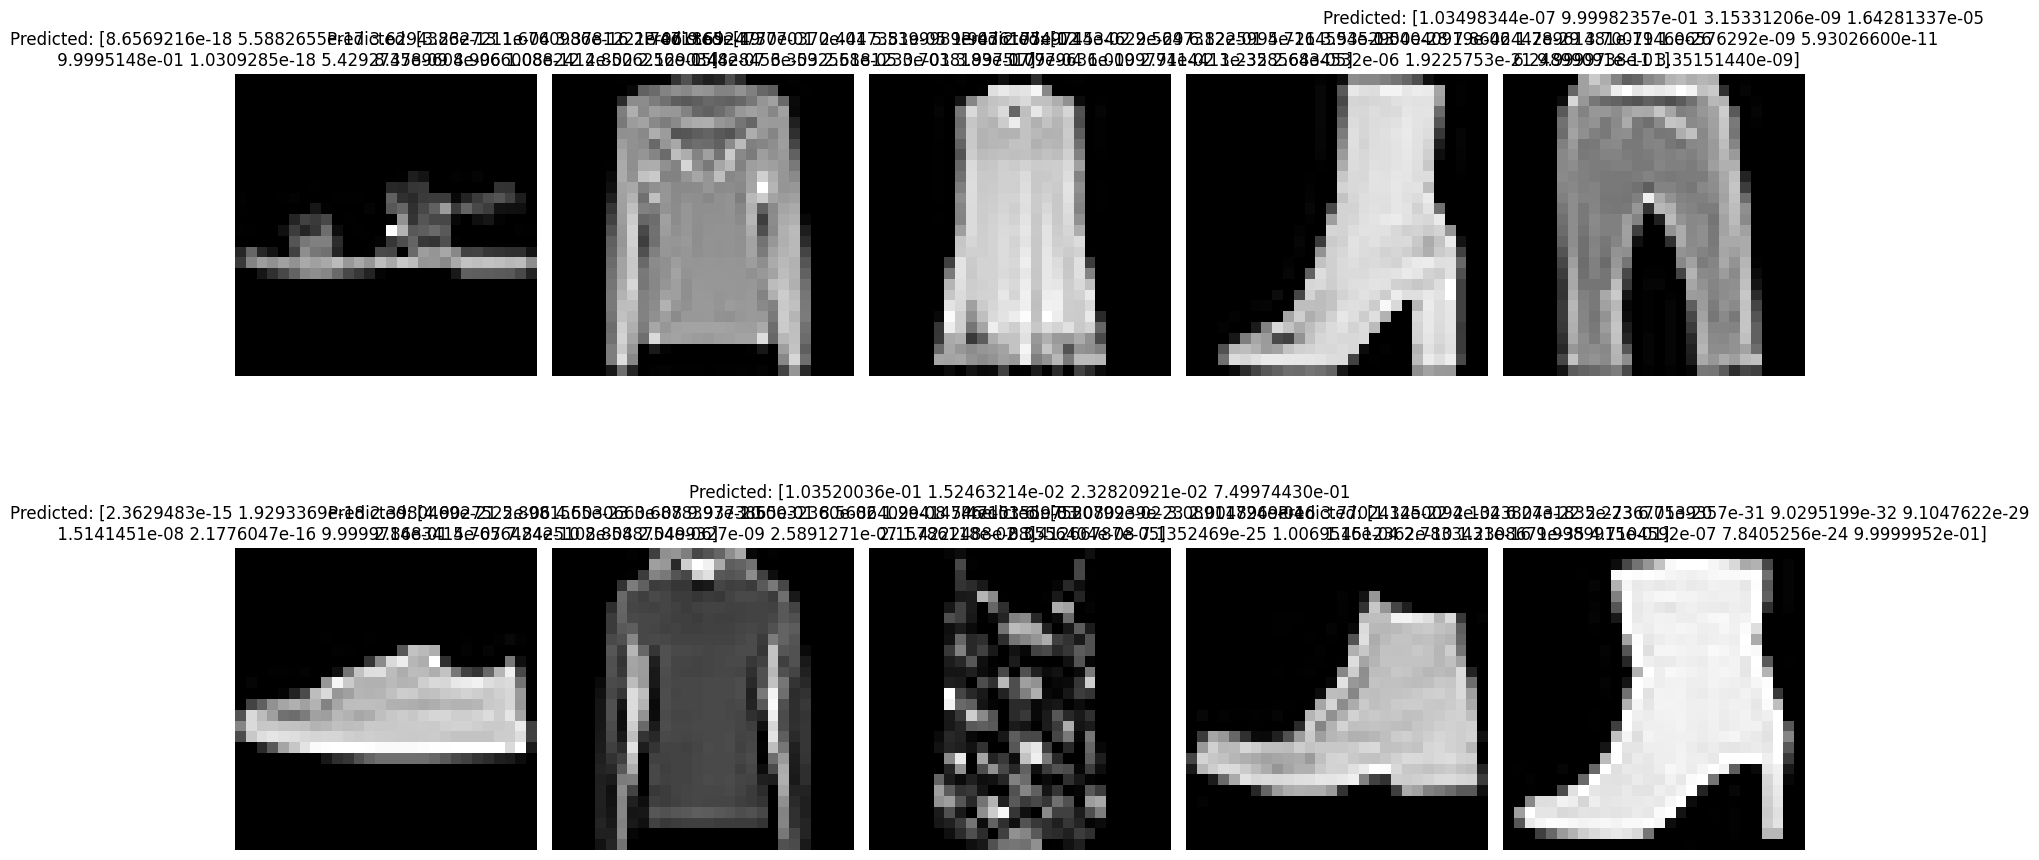

In [24]:
images = x_test[:10]

# Predict labels for the selected images
predictions = model.predict(images)
plt.figure(figsize=(16, 14))
# Plot the images along with their predicted labels
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(images[i].reshape((28, 28)), cmap='gray')
    plt.title(f'Predicted: {predictions[i]}')
    plt.axis('off')
    plt.tight_layout()
plt.show()

157/157 [==============================] - 1s 5ms/step


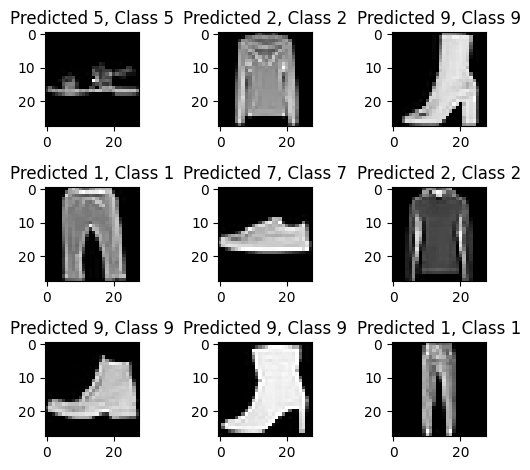

In [23]:
# Select a few images from your test set
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_test[correct].reshape(28, 28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    plt.tight_layout()

plt.show()